**Predictive Model**

---




Predict electricity price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('daily_electricity.csv')
df.head()

,No,datetime,a total daily electricity demand in MWh RRP,recommended retail price in AUD / MWh,total daily demand at positive RRP in MWh,total daily demand at negative RRP in MWh,"an average negative RRP, weighted by the corresponding intraday demand in AUD / MWh",a fraction of the day when the demand was traded at negative RRP,a fraction of the day when the demand was traded at positive RRP,minimum temperature during the day in Celsius,maximum temperature during the day in Celsius,total daily sunlight energy in MJ/m2,daily rainfall in mm,if students were at school on that day,if the day was a state or national holiday
0,39,1/1/2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0,N,Y
1,40,2/1/2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0,N,N
2,41,3/1/2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0,N,N
3,42,4/1/2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,43,5/1/2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0,N,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 15 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   No                                                                                   2106 non-null   int64  
 1   datetime                                                                             2106 non-null   object 
 2   a total daily electricity demand in MWh RRP                                          2106 non-null   float64
 3   recommended retail price in AUD / MWh                                                2106 non-null   float64
 4   total daily demand at positive RRP in MWh                                            2106 non-null   float64
 5   total daily demand at negative RRP in MWh                                            2106 

**Data Wrangling**

---



In [4]:
df.drop('No', axis=1, inplace = True)
df.head()

,datetime,a total daily electricity demand in MWh RRP,recommended retail price in AUD / MWh,total daily demand at positive RRP in MWh,total daily demand at negative RRP in MWh,"an average negative RRP, weighted by the corresponding intraday demand in AUD / MWh",a fraction of the day when the demand was traded at negative RRP,a fraction of the day when the demand was traded at positive RRP,minimum temperature during the day in Celsius,maximum temperature during the day in Celsius,total daily sunlight energy in MJ/m2,daily rainfall in mm,if students were at school on that day,if the day was a state or national holiday
0,1/1/2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0,N,Y
1,2/1/2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0,N,N
2,3/1/2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0,N,N
3,4/1/2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,5/1/2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0,N,N


In [5]:
df.shape

(2106, 14)

### 2 - **Dataset Description:**


1. datetime
2. a total daily electricity demand in MWh RRP
3. recommended retail price in AUD / MWh
4. total daily demand at positive RRP in MWh
5. total daily demand at negative RRP in MWh
6. an average negative RRP, weighted by the corresponding intraday demand in AUD / MWh
7. a fraction of the day when the demand was traded at negative RRP min_temperature
8. minimum temperature during the day in Celsius max_temperature
9. maximum temperature during the day in Celsius
10. total daily sunlight energy in MJ/m2
11. daily rainfall in mm
12. if students were at school on that day
13. if the day was a state or national holiday

In [6]:
#To change the name of the column

In [7]:
name_col = ["Time", "electric-demand","retail-price","demand-at-positive","demand-at-negative","average-negative-RRP","demand-trade-at-negative","demand-trade-at-positive",
         "min-temperature","max-temperature","solar","rainfall","school-day","national-holiday"]

df.columns = name_col

#to add name to the columns

df.head()

,Time,electric-demand,retail-price,demand-at-positive,demand-at-negative,average-negative-RRP,demand-trade-at-negative,demand-trade-at-positive,min-temperature,max-temperature,solar,rainfall,school-day,national-holiday
0,1/1/2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0,N,Y
1,2/1/2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0,N,N
2,3/1/2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0,N,N
3,4/1/2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,5/1/2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0,N,N


In [8]:
df.describe()

,electric-demand,retail-price,demand-at-positive,demand-at-negative,average-negative-RRP,demand-trade-at-negative,demand-trade-at-positive,min-temperature,max-temperature
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000


skew(): This method calculates the skewness of each numerical column in the DataFrame. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. In simpler terms, it indicates whether the data is skewed to the left (negative skew) or to the right (positive skew).

In [9]:
df.select_dtypes(include=np.number).skew()

electric-demand              0.186918
retail-price                24.784220
demand-at-positive          -0.192748
demand-at-negative          24.850409
average-negative-RRP         7.202056
demand-trade-at-negative   -12.294137
demand-trade-at-positive     7.418129
min-temperature              0.304415
max-temperature              0.917045
dtype: float64

**Missing Values**

---



In [10]:
#replace the '? by NaN numpy

import numpy as np

df.replace('?', np.nan, inplace=True)

df.isnull().sum()

Time                        0
electric-demand             0
retail-price                0
demand-at-positive          0
demand-at-negative          0
average-negative-RRP        0
demand-trade-at-negative    0
demand-trade-at-positive    0
min-temperature             0
max-temperature             0
solar                       1
rainfall                    3
school-day                  0
national-holiday            0
dtype: int64

In [11]:
#change the data types

df['solar'] = df['solar'].astype(float)
df['rainfall'] = df['rainfall'].astype(float)

df.dtypes

Time                         object
electric-demand             float64
retail-price                float64
demand-at-positive          float64
demand-at-negative          float64
average-negative-RRP        float64
demand-trade-at-negative    float64
demand-trade-at-positive    float64
min-temperature             float64
max-temperature             float64
solar                       float64
rainfall                    float64
school-day                   object
national-holiday             object
dtype: object

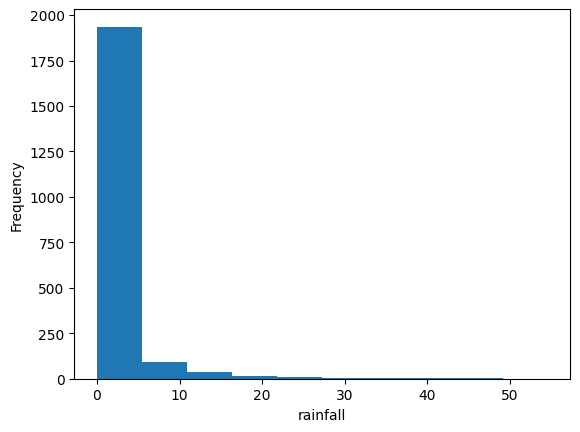

In [12]:
plt.hist(df['rainfall'], bins = 10)
plt.xlabel('rainfall')
plt.ylabel('Frequency')
plt.show()

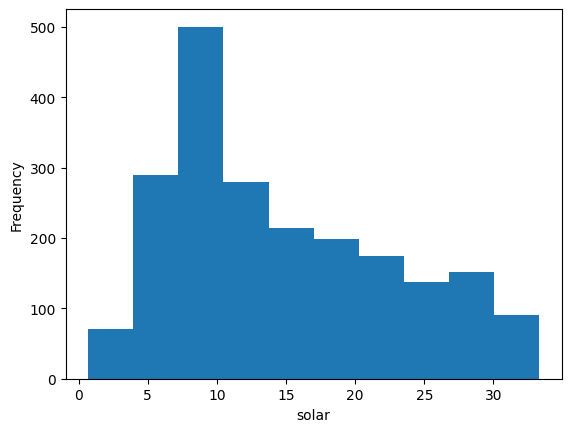

In [13]:
plt.hist(df['solar'], bins = 10)
plt.xlabel('solar')
plt.ylabel('Frequency')
plt.show()

In [14]:
#calculate the mean and median

mean_solar = df['solar'].astype('float').mean()

median_rainfall = df['rainfall'].astype('float').median()

#replace ? with the mean values

df['solar'].replace(np.nan, mean_solar, inplace=True)
df['rainfall'].replace(np.nan, median_rainfall, inplace=True)

df.isnull().sum()


Time                        0
electric-demand             0
retail-price                0
demand-at-positive          0
demand-at-negative          0
average-negative-RRP        0
demand-trade-at-negative    0
demand-trade-at-positive    0
min-temperature             0
max-temperature             0
solar                       0
rainfall                    0
school-day                  0
national-holiday            0
dtype: int64

**Encoding: Categorical Features**

---



In [15]:

# Create a LabelEncoder object
label = LabelEncoder()

# Fit and transform the data
df['school-day_encoded'] = label.fit_transform(df['school-day'])
df['national-holiday_encoded'] = label.fit_transform(df['national-holiday'])

In [16]:
df[['national-holiday', 'national-holiday_encoded']].head(10) #N=0,Y=1

,national-holiday,national-holiday_encoded
0,Y,1
1,N,0
2,N,0
3,N,0
4,N,0
5,N,0
6,N,0
7,N,0
8,N,0
9,N,0


In [17]:
df[['school-day', 'school-day_encoded']].head(10)

,school-day,school-day_encoded
0,N,0
1,N,0
2,N,0
3,N,0
4,N,0
5,N,0
6,N,0
7,N,0
8,N,0
9,N,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      2106 non-null   object 
 1   electric-demand           2106 non-null   float64
 2   retail-price              2106 non-null   float64
 3   demand-at-positive        2106 non-null   float64
 4   demand-at-negative        2106 non-null   float64
 5   average-negative-RRP      2106 non-null   float64
 6   demand-trade-at-negative  2106 non-null   float64
 7   demand-trade-at-positive  2106 non-null   float64
 8   min-temperature           2106 non-null   float64
 9   max-temperature           2106 non-null   float64
 10  solar                     2106 non-null   float64
 11  rainfall                  2106 non-null   float64
 12  school-day                2106 non-null   object 
 13  national-holiday          2106 non-null   object 
 14  school-d

**Group By**

---



**Potential grouping variables to analyze their impact on retail price (Y):**

1. Time-based groupings:
   school-day
   national-holiday
   Time of day (if available)
   Day of week (if available)
   Month (if available)

2. Weather-related groupings:
   min-temperature
   max-temperature
   solar
   rainfall

3. Demand-related groupings:
   electric-demand
   demand-at-positive
   demand-at-negative
   demand-trade-at-negative
   demand-trade-at-positive

4. Price-related groupings:
   average-negative-RRP (though this might be a dependent variable itself)
   price_bins (if created)

**Choosing the right grouping variable depends on your specific research question and the nature of your data.**

* Potential analysis:
* Impact of time on retail price: Group by school-day, national-holiday, day_of_week, or month to see how these factors affect retail prices.
* Impact of weather on retail price: Group by min_temperature, max_temperature, solar, or rainfall to understand the relationship between weather conditions and prices.
* Impact of demand on retail price: Group by electric-demand, demand_at_positive, demand_at_negative, demand_trade_at_negative, or demand_trade_at_positive to analyze how demand levels influence prices.

In [19]:
df9 = df[['school-day', 'national-holiday', 'retail-price']]

df9_group = df9.groupby(['school-day', 'national-holiday'], as_index=False).mean()

df9_group  #df9_group is time based group

,school-day,national-holiday,retail-price
0,N,N,79.110162
1,N,Y,54.691890
2,Y,N,75.926746
3,Y,Y,57.110745


In [20]:
#we can convert group by to a pivot table

df9_pivot = df9_group.pivot(index='national-holiday', columns='school-day')
#row is called index
df9_pivot

retail-price           
school-day                  N          Y
national-holiday                        
N                   79.110162  75.926746
Y                   54.691890  57.110745

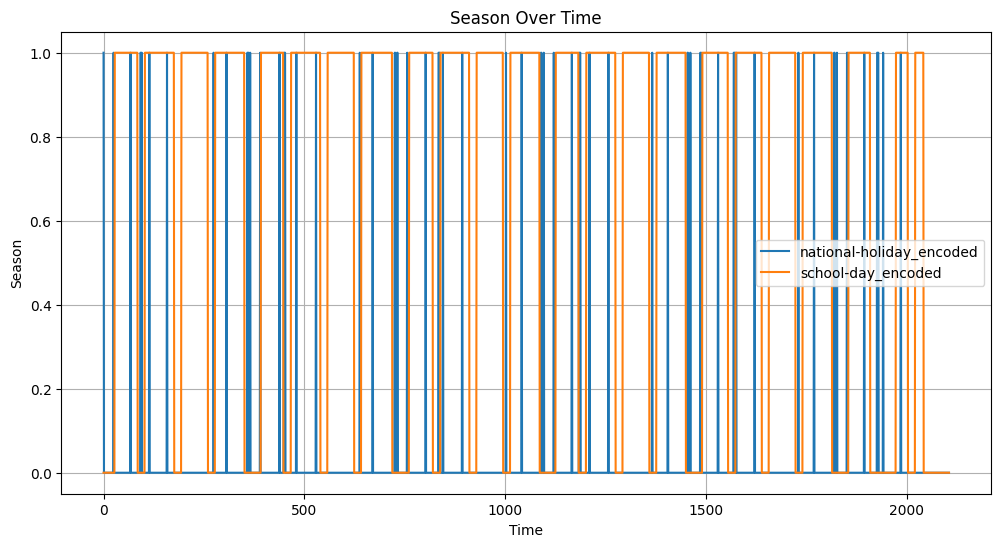

In [21]:
# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['national-holiday_encoded'], label='national-holiday_encoded')
plt.plot(df['school-day_encoded'], label='school-day_encoded')
plt.xlabel('Time')
plt.ylabel('Season')
plt.title('Season Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df.columns


Index(['Time', 'electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded'],
      dtype='object')

In [23]:
df8 = df[['max-temperature', 'min-temperature', 'solar', 'rainfall', 'Time', 'retail-price']]

df8_group = df8.groupby(['max-temperature', 'min-temperature', 'solar', 'Time', 'rainfall'], as_index=False).mean()

df8_group  #df8_group is weather based group

,max-temperature,min-temperature,solar,Time,rainfall,retail-price
0,9.0,3.1,4.4,3/8/2017,0.0,169.233827
1,9.6,3.6,5.9,23/6/2019,1.2,127.601903
2,9.8,8.1,4.8,14/7/2015,3.8,45.255583
3,10.1,7.8,7.3,9/8/2019,2.0,119.957482
4,10.3,7.7,4.1,3/7/2020,0.0,43.512020
...,...,...,...,...,...,...
2101,42.2,16.8,25.0,13/1/2016,0.2,545.737820
2102,42.6,18.0,27.4,4/1/2019,0.0,121.020997
2103,42.8,21.1,25.3,25/1/2019,0.0,906.437232
2104,42.9,21.5,18.3,31/1/2020,0.0,2809.437516


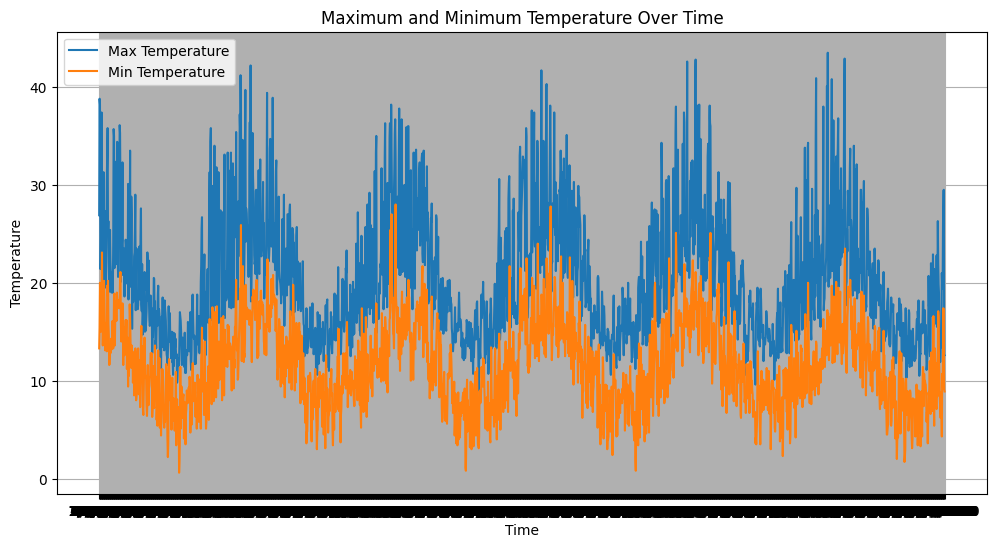

In [24]:
df.set_index('Time', inplace=True)

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['max-temperature'], label='Max Temperature')
plt.plot(df['min-temperature'], label='Min Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Maximum and Minimum Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Statistical Analysis

max_temp=df['max-temperature']
min_temp=df['min-temperature']
max_temp_mean = np.mean(max_temp)
min_temp_mean = np.mean(min_temp)
max_temp_median = np.median(max_temp)
min_temp_median = np.median(min_temp)
max_temp_std = np.std(max_temp)
min_temp_std = np.std(min_temp)

print(f"Max Temp - Mean: {max_temp_mean}, Median: {max_temp_median}, Std Dev: {max_temp_std}")
print(f"Min Temp - Mean: {min_temp_mean}, Median: {min_temp_median}, Std Dev: {min_temp_std}")


Max Temp - Mean: 20.413200379867046, Median: 19.1, Std Dev: 6.287200138299337
Min Temp - Mean: 11.582288698955365, Median: 11.3, Std Dev: 4.312686367883252


The cyclic nature of the temperature data with four visible peaks and troughs suggests a strong seasonal pattern. Each cycle likely represents a year, with peaks corresponding to summer months and troughs to winter months.

**Mean and Median:**
For max temperatures, the mean (20.41°C) is slightly higher than the median (19.1°C), indicating a right-skewed distribution, where a few higher temperatures are pulling the mean up.
For min temperatures, the mean (11.58°C) is close to the median (11.3°C), suggesting a relatively symmetric distribution.


**Standard Deviation:**
The max temperatures have a standard deviation of 6.29°C, indicating significant variability and suggesting that temperatures frequently deviate from the mean.
The min temperatures have a standard deviation of 4.31°C, showing moderate variability, but less than the max temperatures.

**Highs and Lows:**

The highest maximum temperatures reach above 40°C, indicating very hot periods.
The lowest minimum temperatures fall below 10°C, showing significant drops, likely in winter months.

**Consistency and Anomalies:**

While the pattern is generally consistent, any anomalies (unexpected peaks or troughs) could indicate unusual weather events such as heatwaves or cold snaps.
Practical Implications

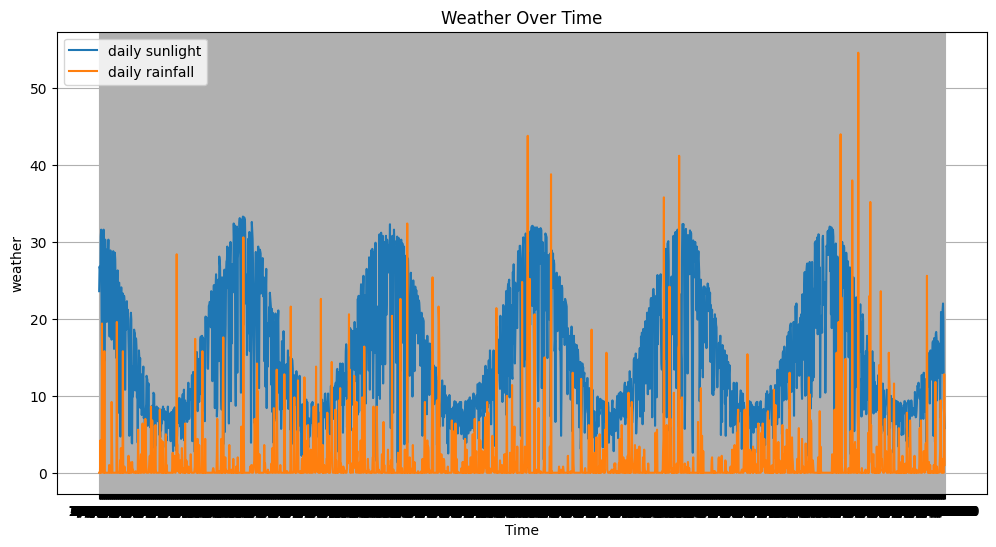

In [26]:

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['solar'], label='daily sunlight')
plt.plot(df['rainfall'], label='daily rainfall')
plt.xlabel('Time')
plt.ylabel('weather')
plt.title('Weather Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Statistical Analysis


negative_rrp=df['average-negative-RRP']
# Calculate mean, median, and standard deviation
mean_negative_rrp = np.mean(negative_rrp)
median_negative_rrp = np.median(negative_rrp)
std_negative_rrp = np.std(negative_rrp)

print(f"Mean Negative RRP: {mean_negative_rrp}")
print(f"Median Negative RRP: {median_negative_rrp}")
print(f"Standard Deviation Negative RRP: {std_negative_rrp}")


Mean Negative RRP: 783.1714482431149
Median Negative RRP: 0.0
Standard Deviation Negative RRP: 3578.070888923916


**Central Tendency**

**Daily Sunlight:**

The mean sunlight value of 14.74 units is higher than the median value of 12.75 units. This suggests a right-skewed distribution where there are days with exceptionally high sunlight that pull the mean up.

**Daily Rainfall:**

The mean and median rainfall values are both 1.50 units, indicating a symmetric distribution of rainfall data. However, rainfall is generally low with occasional higher values.

**Variability**

**Daily Sunlight:**

A standard deviation of 7.94 units indicates considerable variability in daily sunlight. This suggests that sunlight exposure can fluctuate significantly from day to day.

**Daily Rainfall:**

A standard deviation of 4.30 units indicates high variability in daily rainfall, with most days having low or no rainfall but occasional days with significantly higher rainfall.

**Graphical Analysis**

**Seasonal Patterns**

**Cyclic Nature of Sunlight:**

The plot shows regular cycles in sunlight, corresponding to seasonal changes. Peaks likely correspond to summer months with higher sunlight, while troughs correspond to winter months with lower sunlight.
The pattern of sunlight is consistent with the statistical measures, showing high variability (standard deviation) and higher peaks causing the mean to be higher than the median.

**Rainfall Patterns**

**Irregular Rainfall:**

Rainfall data shows less predictable patterns with frequent spikes. The plot indicates periods with no rainfall interspersed with days of significant rainfall.
The high standard deviation relative to the mean indicates that rainfall events are sporadic but can be intense.


**Highs and Lows:**

The highest peaks in daily sunlight occur consistently, likely during summer months, while the lowest points occur in winter.
Rainfall spikes are irregular but noticeable, with some significant peaks indicating heavy rain events.


**Consistency and Anomalies:**

Sunlight data shows a regular and predictable pattern, while rainfall data appears more random and less predictable.
Identifying any unusually high rainfall spikes can indicate significant weather events such as storms.


**Sunlight Range:**

The range of daily sunlight fluctuates significantly, from 0 to around 30 units, indicating the variation between sunny and cloudy days or seasonal changes.


**Rainfall Variability:**

Rainfall spikes vary in height, suggesting varying amounts of rainfall on different days.
There are periods with high rainfall spikes, reaching up to 50 units, indicating heavy rain events.

In [28]:
df7 = df[['demand-at-positive', 'demand-at-negative', 'demand-trade-at-positive', 'demand-trade-at-negative', 'electric-demand', 'retail-price']]

df7_group = df7.groupby(['demand-at-positive', 'demand-at-negative', 'demand-trade-at-positive', 'demand-trade-at-negative', 'electric-demand'], as_index=False).mean()

df7_group  #df7_group is demand based group

,demand-at-positive,demand-at-negative,demand-trade-at-positive,demand-trade-at-negative,electric-demand,retail-price
0,41988.240,26.980251,0.625000,-30.173823,99585.835,-6.076028
1,44133.510,32.438156,0.583333,-33.538025,92277.025,-1.983471
2,61517.580,25.582436,0.437500,-17.162458,98917.175,9.421019
3,63861.950,31.168805,0.354167,-5.476441,92097.070,19.934106
4,65215.145,14.167928,0.333333,-9.482034,94325.720,6.869135
...,...,...,...,...,...,...
2101,160437.565,107.657425,0.000000,0.000000,160437.565,107.657425
2102,163682.040,1284.799876,0.000000,0.000000,163682.040,1284.799876
2103,165070.595,647.574163,0.000000,0.000000,165070.595,647.574163
2104,168894.845,906.437232,0.000000,0.000000,168894.845,906.437232


In [29]:
df6 = df[['average-negative-RRP', 'retail-price']]

df6_group = df6.groupby(['average-negative-RRP'], as_index=False).mean()

df6_group  #df6_group is price based group

,average-negative-RRP,retail-price
0,0.000,79.874316
1,1556.045,73.950065
2,1631.350,86.802686
3,1707.455,40.256705
4,1740.595,22.029095
...,...,...
187,29776.135,13.563056
188,32884.130,-1.761423
189,37399.595,9.421019
190,48143.515,-1.983471


The relationship between average RRP and retail prices is complex and influenced by various factors. While a positive correlation might be expected in certain conditions, a negative correlation is equally possible. To accurately assess the relationship in a specific context, it's essential to consider the factors mentioned above and analyze historical data.

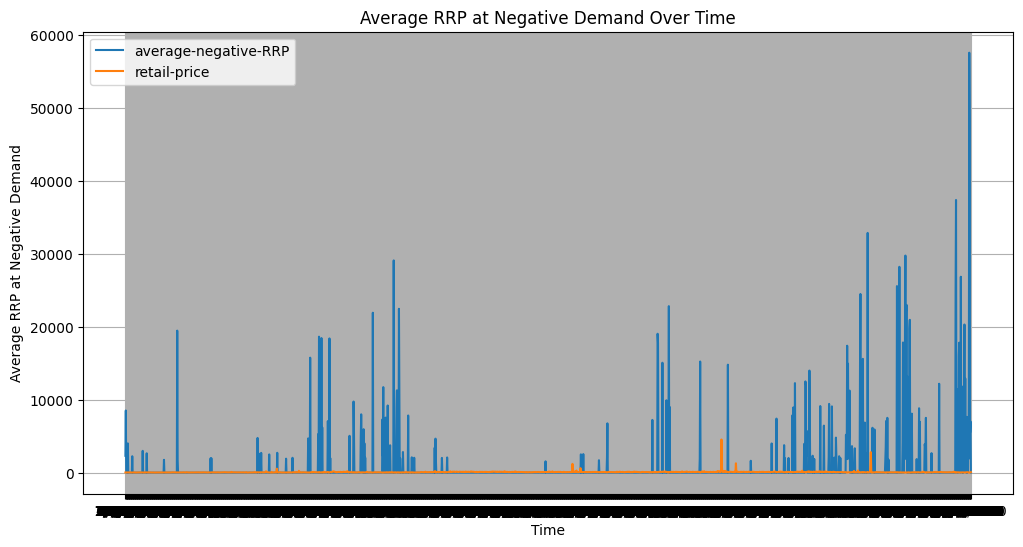

In [30]:
# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['average-negative-RRP'], label='average-negative-RRP')
plt.plot(df['retail-price'], label='retail-price')
plt.xlabel('Time')
plt.ylabel('Average RRP at Negative Demand')
plt.title('Average RRP at Negative Demand Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
df.columns


Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded'],
      dtype='object')

In [32]:
#Statistical Analysis

rrp=df['average-negative-RRP']

# Calculate mean, median, and standard deviation
mean_rrp = df['average-negative-RRP'].mean()
median_rrp = df['average-negative-RRP'].median()
std_dev_rrp = df['average-negative-RRP'].std()

print("Mean RRP:", mean_rrp)
print("Median RRP:", median_rrp)
print("Standard Deviation RRP:", std_dev_rrp)

Mean RRP: 783.1714482431149
Median RRP: 0.0
Standard Deviation RRP: 3578.9206860832496


The graph shows that the price of electricity in Victoria can change quickly when there's too much electricity. Sometimes the price is very high, and sometimes it's very low or even free. This happens because the market is trying to balance the amount of electricity available with the amount people want to use.

**Visualization**

---



<Axes: xlabel='school-day_encoded'>

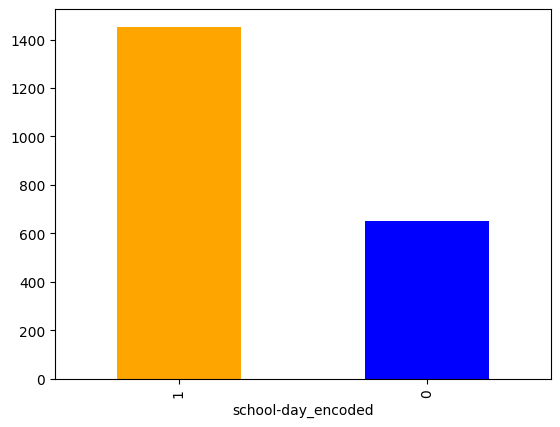

In [33]:
df['school-day_encoded'].value_counts().plot(kind='bar',color=['orange','blue'])

<Axes: xlabel='national-holiday_encoded'>

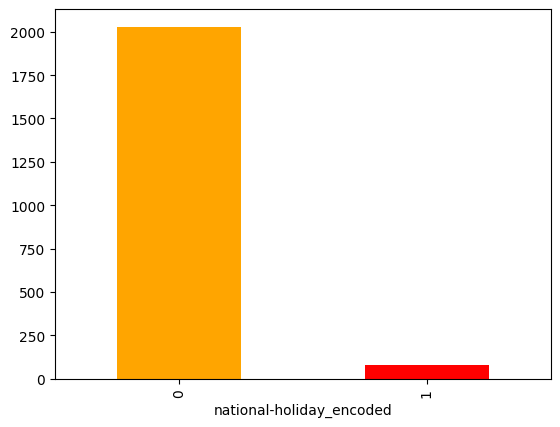

In [34]:
df['national-holiday_encoded'].value_counts().plot(kind='bar',color=['orange','red'])

<Axes: xlabel='school-day_encoded', ylabel='retail-price'>

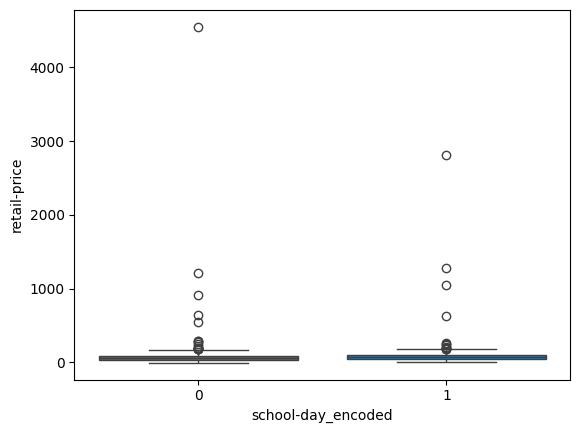

In [35]:
sns.boxplot(x="school-day_encoded", y="retail-price", data=df)

<Axes: xlabel='national-holiday_encoded', ylabel='retail-price'>

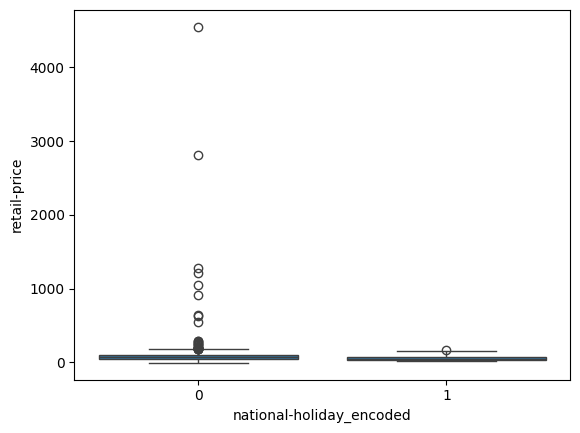

In [36]:
sns.boxplot(x="national-holiday_encoded", y="retail-price", data=df)

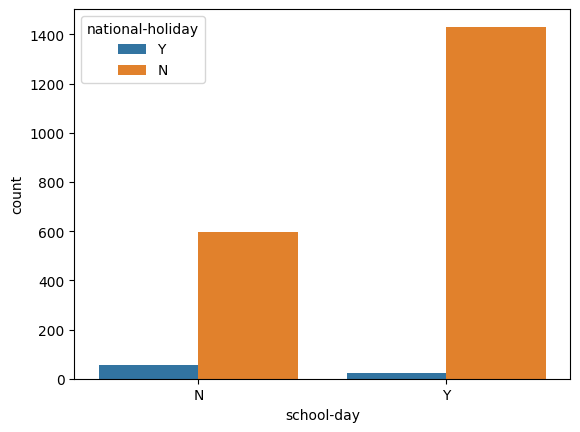

In [37]:
# Create the countplot with hue
sns.countplot(x='school-day', hue='national-holiday', data=df)
plt.show()

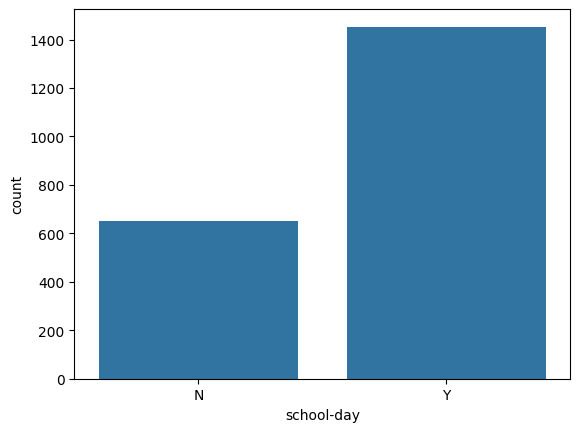

In [38]:
# Create the countplot with hue
sns.countplot(x='school-day', data=df)
plt.show()

**Distribution**

---



In [39]:
df.columns

Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded'],
      dtype='object')

<ipython-input-40-9212720c61c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['electric-demand'])


<Axes: xlabel='electric-demand', ylabel='Density'>

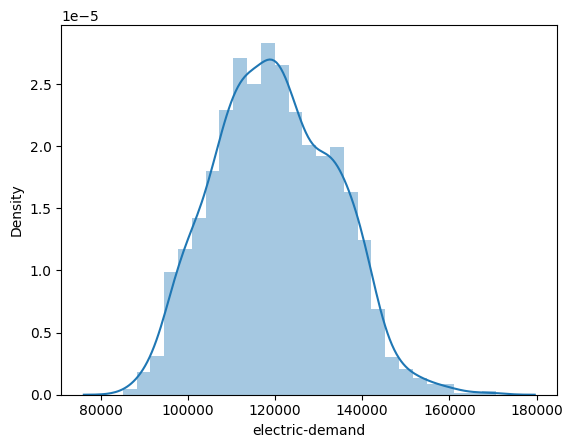

In [40]:
sns.distplot(df['electric-demand'])

<ipython-input-41-1dc97e88f3eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['demand-at-positive'])


<Axes: xlabel='demand-at-positive', ylabel='Density'>

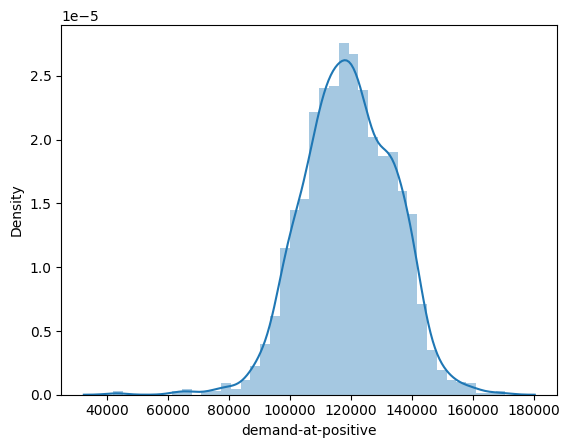

In [41]:
sns.distplot(df['demand-at-positive'])

<ipython-input-42-7cd7941ad37b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['demand-at-negative'])


<Axes: xlabel='demand-at-negative', ylabel='Density'>

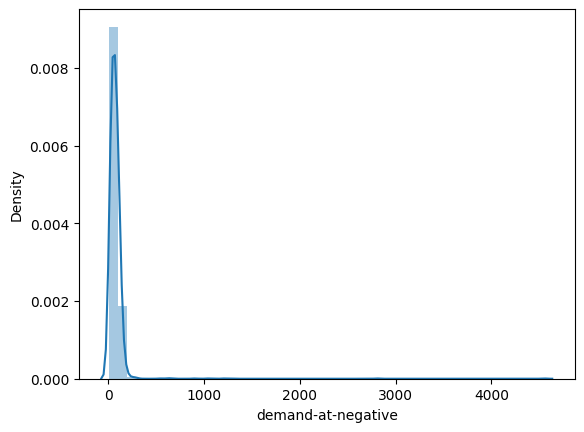

In [42]:
sns.distplot(df['demand-at-negative'])

<ipython-input-43-bb0e3e808c53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average-negative-RRP'])


<Axes: xlabel='average-negative-RRP', ylabel='Density'>

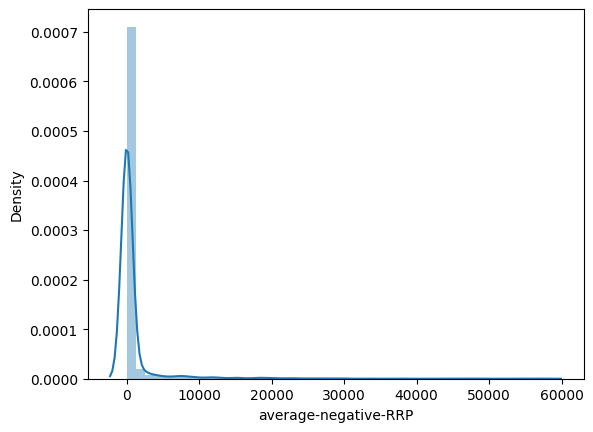

In [43]:
sns.distplot(df['average-negative-RRP'])

<ipython-input-44-6232f475f826>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['demand-trade-at-negative'])


<Axes: xlabel='demand-trade-at-negative', ylabel='Density'>

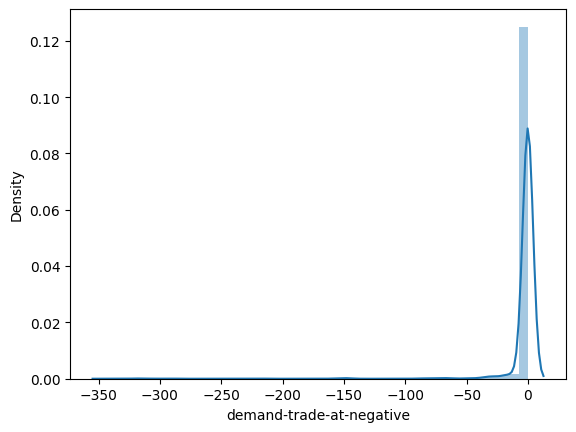

In [44]:
sns.distplot(df['demand-trade-at-negative'])

<ipython-input-45-c38897ea12e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['demand-trade-at-positive'])


<Axes: xlabel='demand-trade-at-positive', ylabel='Density'>

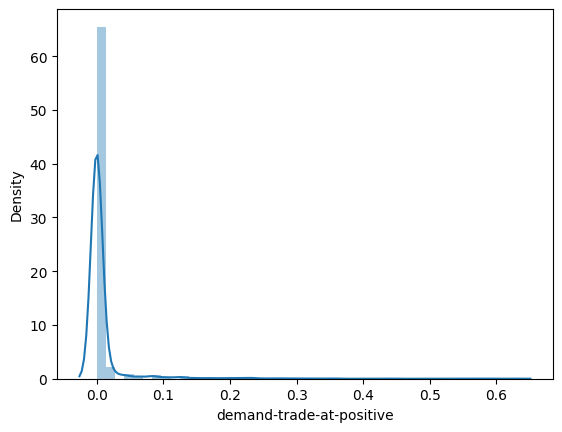

In [45]:
sns.distplot(df['demand-trade-at-positive'])

<ipython-input-46-a2a7d9b5da05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['min-temperature'])


<Axes: xlabel='min-temperature', ylabel='Density'>

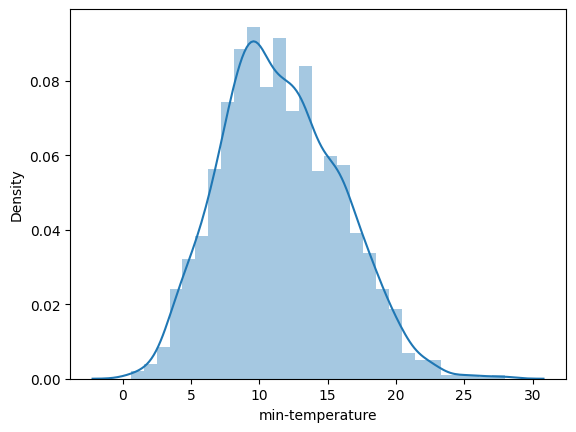

In [46]:
sns.distplot(df['min-temperature'])

<ipython-input-47-62cb0cc9543b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['max-temperature'])


<Axes: xlabel='max-temperature', ylabel='Density'>

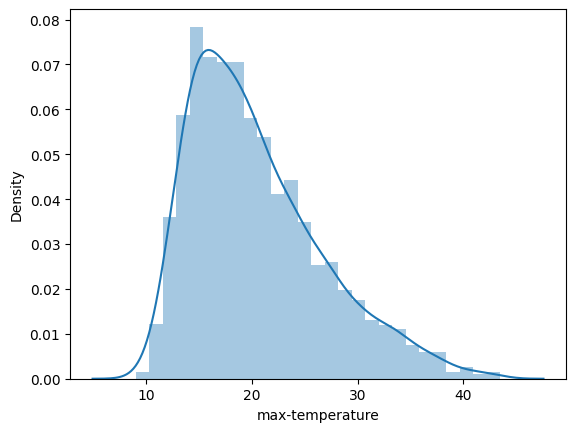

In [47]:
sns.distplot(df['max-temperature'])

<ipython-input-48-efe5e0e0dda5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['solar'])


<Axes: xlabel='solar', ylabel='Density'>

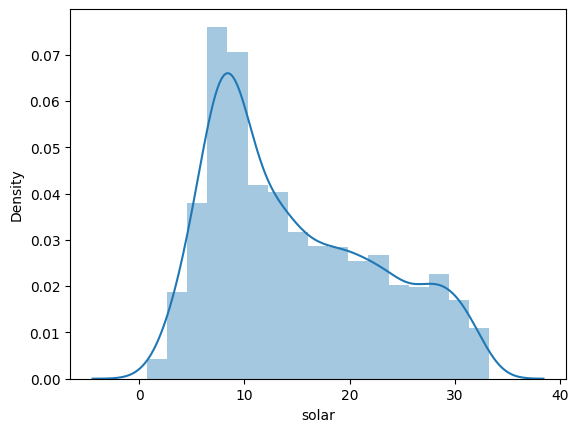

In [48]:
sns.distplot(df['solar'])

<ipython-input-49-b871839ab324>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rainfall'])


<Axes: xlabel='rainfall', ylabel='Density'>

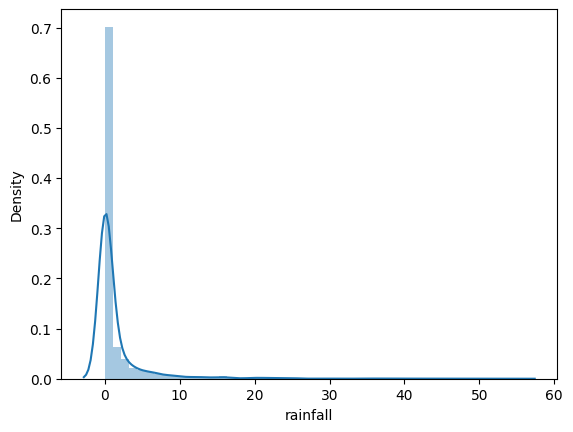

In [49]:
sns.distplot(df['rainfall'])

<ipython-input-50-e192689664ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['school-day_encoded'])


<Axes: xlabel='school-day_encoded', ylabel='Density'>

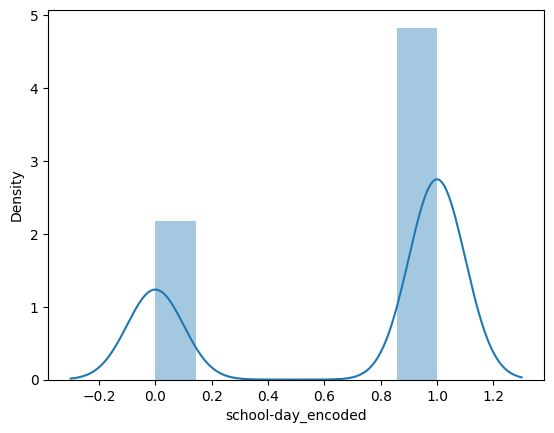

In [50]:
sns.distplot(df['school-day_encoded'])

<ipython-input-51-6bf4a00b533c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['national-holiday_encoded'])


<Axes: xlabel='national-holiday_encoded', ylabel='Density'>

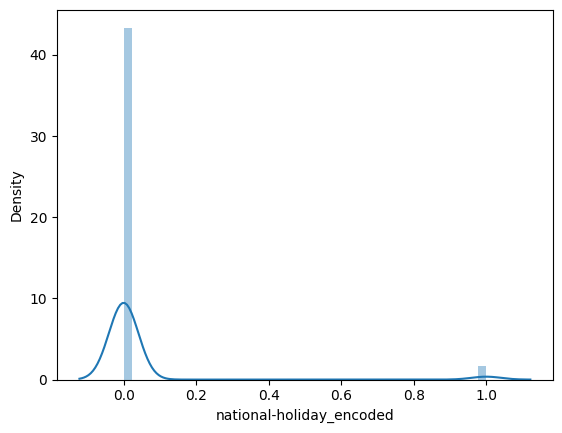

In [51]:
sns.distplot(df['national-holiday_encoded'])

**Outlier**

---



In [52]:
df.columns


Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded'],
      dtype='object')

**Boxplot**

---



(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'electric-demand'),
  Text(2, 0, 'retail-price'),
  Text(3, 0, 'demand-at-positive'),
  Text(4, 0, 'demand-at-negative'),
  Text(5, 0, 'average-negative-RRP'),
  Text(6, 0, 'demand-trade-at-negative'),
  Text(7, 0, 'demand-trade-at-positive'),
  Text(8, 0, 'min-temperature'),
  Text(9, 0, 'max-temperature'),
  Text(10, 0, 'solar'),
  Text(11, 0, 'rainfall')])

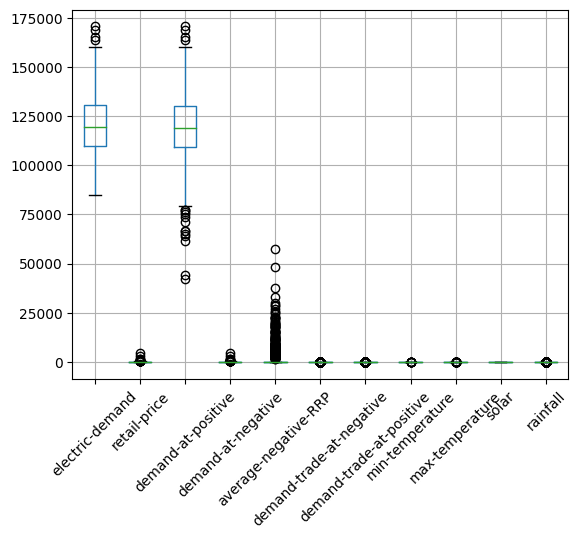

In [53]:
df[['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday']].boxplot()
plt.xticks(rotation=45)

**Heatmap**

---



In [54]:
df1 = df[['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall']]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 1/1/2015 to 6/10/2020
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   electric-demand           2106 non-null   float64
 1   retail-price              2106 non-null   float64
 2   demand-at-positive        2106 non-null   float64
 3   demand-at-negative        2106 non-null   float64
 4   average-negative-RRP      2106 non-null   float64
 5   demand-trade-at-negative  2106 non-null   float64
 6   demand-trade-at-positive  2106 non-null   float64
 7   min-temperature           2106 non-null   float64
 8   max-temperature           2106 non-null   float64
 9   solar                     2106 non-null   float64
 10  rainfall                  2106 non-null   float64
 11  school-day                2106 non-null   object 
 12  national-holiday          2106 non-null   object 
 13  school-day_encoded        2106 non-null   int64  
 14  n

<Axes: >

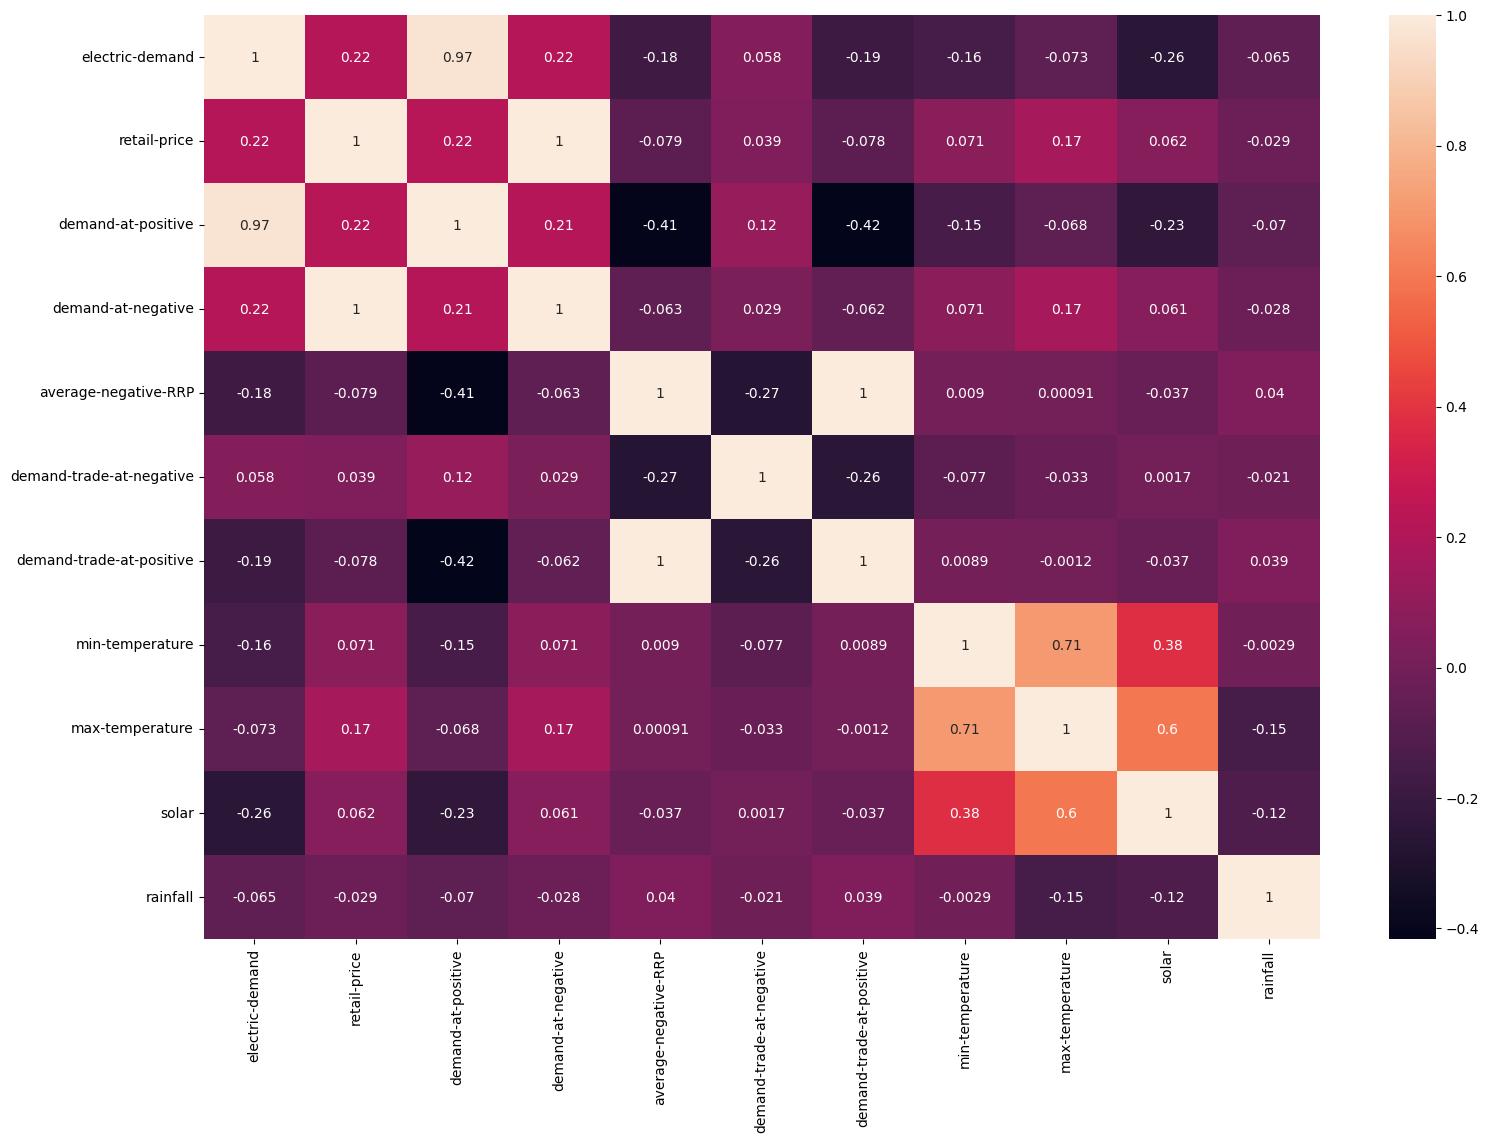

In [56]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True)

**Data Binning**

---



In [57]:
#custom binning

def custom_binning(price):
    if price < 50:
        return 'Low'
    elif price < 150:
        return 'Medium'
    else:
        return 'High'

df['price_bins'] = df['retail-price'].apply(custom_binning)

In [58]:
print(df['price_bins'])

Time
1/1/2015        Low
2/1/2015        Low
3/1/2015        Low
4/1/2015        Low
5/1/2015        Low
              ...  
2/10/2020       Low
3/10/2020       Low
4/10/2020       Low
5/10/2020       Low
6/10/2020    Medium
Name: price_bins, Length: 2106, dtype: object


In [59]:
df['price_bins'].value_counts()

price_bins
Medium    1256
Low        791
High        59
Name: count, dtype: int64

**Train and Split**

---


In [60]:
msk = np.random.rand(len(df)) <= 0.8
train = df1[msk]
test = df1[~msk]

#take the rest of the data #randomly choosing

#it mean 80% will be choose randomly

regr = linear_model.LinearRegression()

#Mention and label the x and y

#need to use array - convert from panda

train_x = np.asanyarray(train[['demand-trade-at-negative']])
train_y = np.asanyarray(train[['retail-price']])


#training
regr.fit (train_x, train_y)


LinearRegression()

In [61]:
print('The value of the slope is:', regr.coef_)
print('The value of the intercept is:', regr.intercept_)

The value of the slope is: [[0.3293281]]
The value of the intercept is: [75.86734088]


In [62]:
x = int(df['demand-at-negative'].sample())

#setiap kali dia run this command will give different value since it take from sample

y = regr.intercept_ + regr.coef_ *x

y

<ipython-input-62-bba5c86f3889>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['demand-at-negative'].sample())


array([[84.75919961]])

**Select The Best Features**

---



In [63]:
df1.describe(include='all')

,electric-demand,retail-price,demand-at-positive,demand-at-negative,average-negative-RRP,demand-trade-at-negative,demand-trade-at-positive,min-temperature,max-temperature,solar,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.503799
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.943640,4.305201
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.750000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


In [64]:
df1.corr()

,electric-demand,retail-price,demand-at-positive,demand-at-negative,average-negative-RRP,demand-trade-at-negative,demand-trade-at-positive,min-temperature,max-temperature,solar,rainfall
electric-demand,1.000000,0.217538,0.971377,0.215038,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257364,-0.064662
retail-price,0.217538,1.000000,0.220856,0.999821,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061808,-0.028615
demand-at-positive,0.971377,0.220856,1.000000,0.214628,-0.409102,0.120054,-0.416573,-0.147020,-0.068146,-0.229721,-0.069770
demand-at-negative,0.215038,0.999821,0.214628,1.000000,-0.062631,0.029455,-0.061968,0.071052,0.165663,0.061311,-0.027832
average-negative-RRP,-0.180638,-0.078815,-0.409102,-0.062631,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037467,0.040491
demand-trade-at-negative,0.057854,0.038931,0.120054,0.029455,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001654,-0.020861
demand-trade-at-positive,-0.189839,-0.077955,-0.416573,-0.061968,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036700,0.038629
min-temperature,-0.156118,0.070619,-0.147020,0.071052,0.009030,-0.077248,0.008859,1.000000,0.705433,0.375967,-0.002938
max-temperature,-0.073216,0.165484,-0.068146,0.165663,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.598771,-0.154980
solar,-0.257364,0.061808,-0.229721,0.061311,-0.037467,0.001654,-0.036700,0.375967,0.598771,1.000000,-0.123311


In [65]:
def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

In [66]:
calculate_and_sort_correlations(df1, 'retail-price')

average-negative-RRP       -0.078815
demand-trade-at-positive   -0.077955
rainfall                   -0.028615
demand-trade-at-negative    0.038931
solar                       0.061808
min-temperature             0.070619
max-temperature             0.165484
electric-demand             0.217538
demand-at-positive          0.220856
demand-at-negative          0.999821
Name: retail-price, dtype: float64

In [67]:
regr1 = linear_model.LinearRegression()

#Mention and label the x and y

train_x1 = np.asanyarray(train[['average-negative-RRP']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['average-negative-RRP']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 0.66
The MSE is: 1567585.51
The MAE is: 3474.53


In [68]:
regr1 = linear_model.LinearRegression()

#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-negative']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-negative']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.96
The MSE is: 665.06
The MAE is: 87.43


In [69]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['min-temperature']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['min-temperature']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 0.37
The MSE is: 1572094.57
The MAE is: 3653.24


In [70]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['max-temperature']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['max-temperature']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 2.13
The MSE is: 1544299.38
The MAE is: 3791.07


In [71]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['solar']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['solar']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 0.44
The MSE is: 1571034.2
The MAE is: 3668.44


In [72]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['rainfall']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['rainfall']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 0.07
The MSE is: 1576925.97
The MAE is: 3588.79


In [73]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['electric-demand']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['electric-demand']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 3.71
The MSE is: 1519424.72
The MAE is: 3680.75


In [74]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['max-temperature']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['max-temperature']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 2.13
The MSE is: 1544299.38
The MAE is: 3791.07


In [75]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-positive']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-positive']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 3.93
The MSE is: 1516036.42
The MAE is: 3613.41


**Regression Plot**

---



In [76]:
df.columns


Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded',
       'price_bins'],
      dtype='object')

<Axes: xlabel='solar', ylabel='retail-price'>

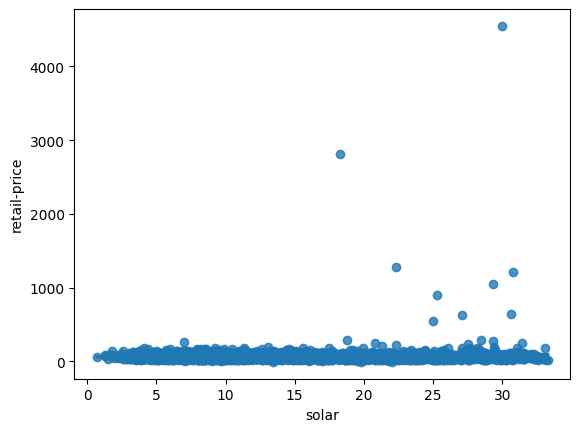

In [77]:
sns.regplot(x="solar", y="retail-price", data=df1)

<Axes: xlabel='electric-demand', ylabel='retail-price'>

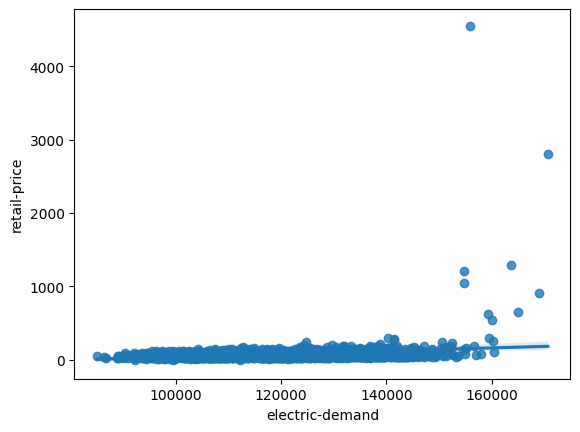

In [78]:
sns.regplot(x="electric-demand", y="retail-price", data=df1)

<Axes: xlabel='demand-at-positive', ylabel='retail-price'>

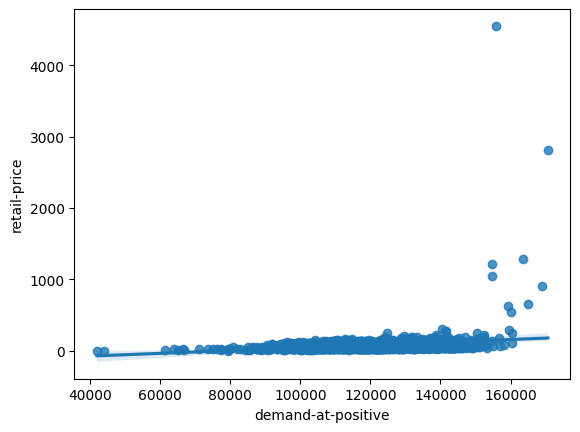

In [79]:
sns.regplot(x="demand-at-positive", y="retail-price", data=df1)

<Axes: xlabel='demand-at-negative', ylabel='retail-price'>

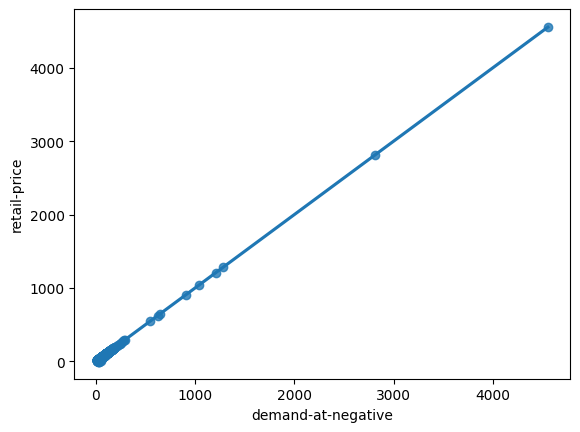

In [80]:
sns.regplot(x="demand-at-negative", y="retail-price", data=df1)

<Axes: xlabel='average-negative-RRP', ylabel='retail-price'>

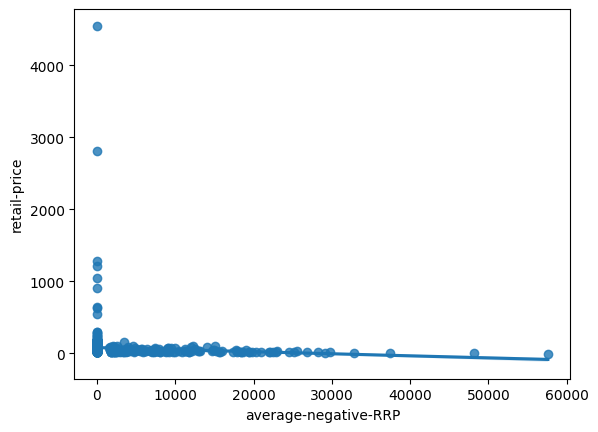

In [81]:
sns.regplot(x="average-negative-RRP", y="retail-price", data=df1)

<Axes: xlabel='demand-trade-at-negative', ylabel='retail-price'>

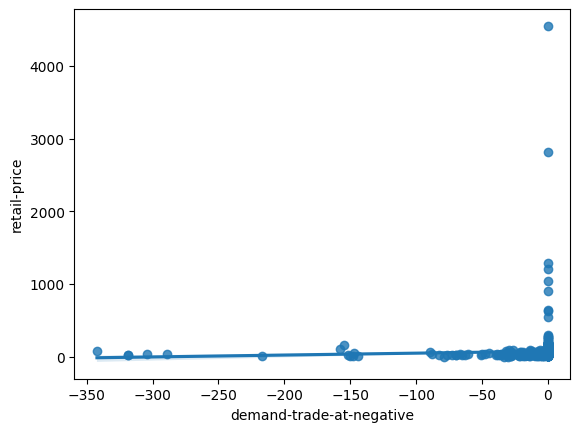

In [82]:
sns.regplot(x="demand-trade-at-negative", y="retail-price", data=df1)

<Axes: xlabel='demand-trade-at-positive', ylabel='retail-price'>

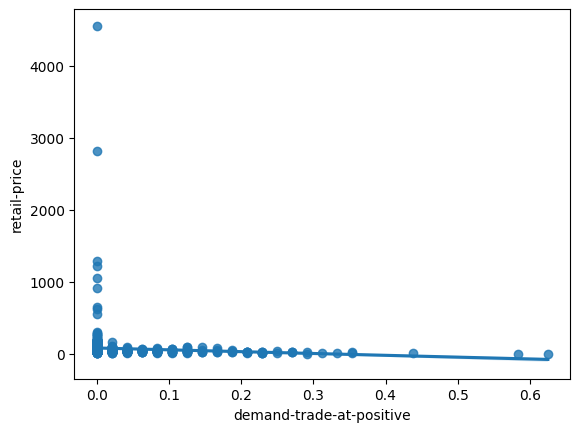

In [83]:
sns.regplot(x="demand-trade-at-positive", y="retail-price", data=df1)

<Axes: xlabel='min-temperature', ylabel='retail-price'>

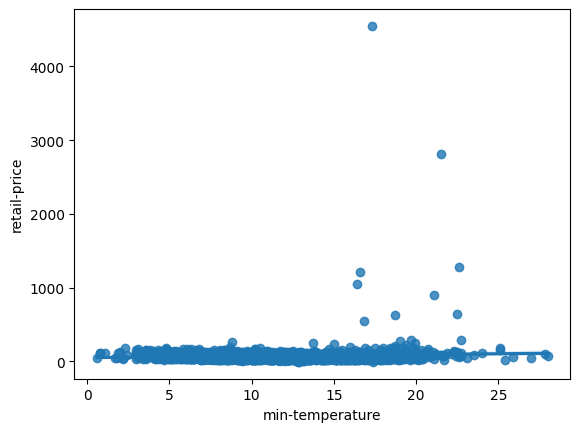

In [84]:
sns.regplot(x="min-temperature", y="retail-price", data=df)

<Axes: xlabel='max-temperature', ylabel='retail-price'>

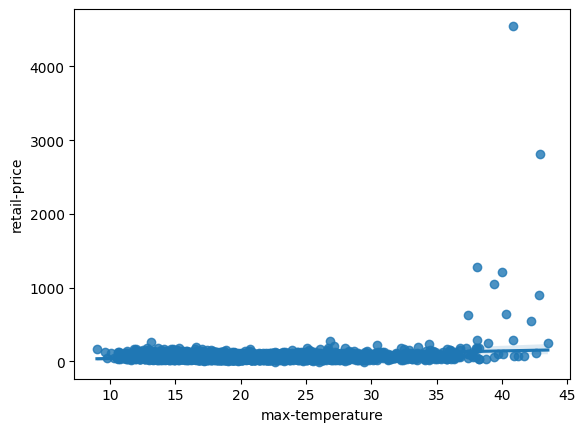

In [85]:
sns.regplot(x="max-temperature", y="retail-price", data=df)

<Axes: xlabel='rainfall', ylabel='retail-price'>

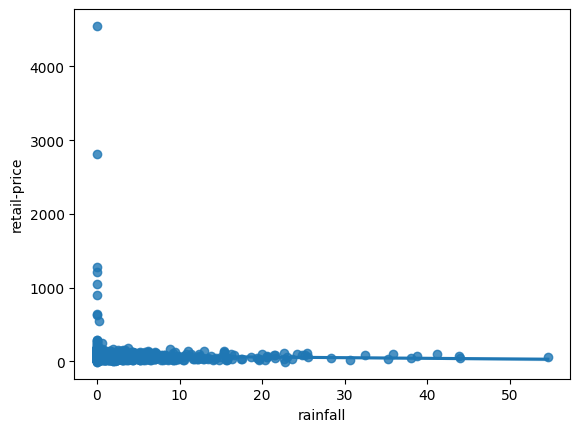

In [86]:
sns.regplot(x="rainfall", y="retail-price", data=df)

<Axes: xlabel='national-holiday_encoded', ylabel='retail-price'>

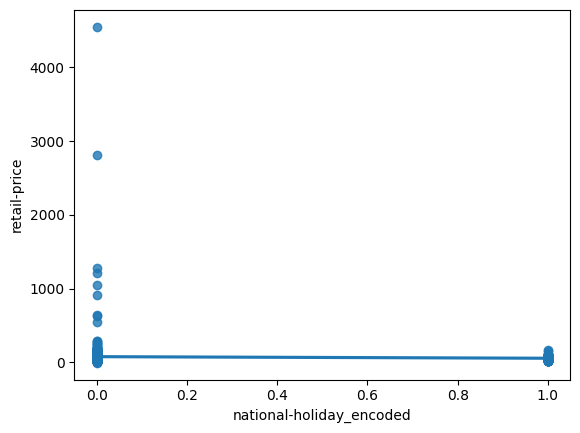

In [87]:
sns.regplot(x="national-holiday_encoded", y="retail-price", data=df)

<Axes: xlabel='school-day_encoded', ylabel='retail-price'>

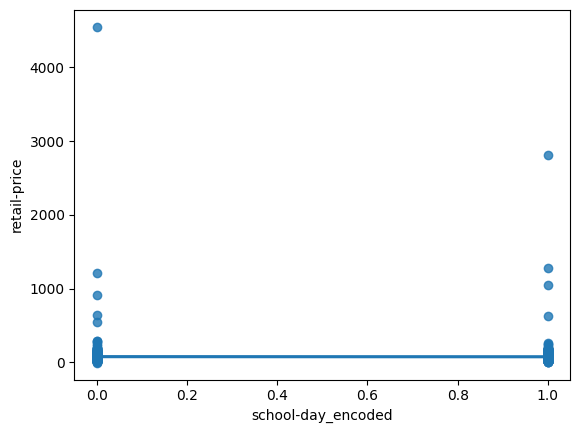

In [88]:
sns.regplot(x="school-day_encoded", y="retail-price", data=df)

**Multilinear Regression**

---



In [89]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-positive', 'demand-at-negative']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-positive', 'demand-at-negative']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.96
The MSE is: 588.98
The MAE is: 103.66


In [90]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-positive', 'demand-at-negative', 'max-temperature']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-positive', 'demand-at-negative', 'max-temperature']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.96
The MSE is: 588.56
The MAE is: 103.4


In [91]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.96
The MSE is: 652.69
The MAE is: 86.88


In [92]:
'demand-at-negative' 'average-negative-RRP'

'demand-at-negativeaverage-negative-RRP'

In [93]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.99
The MSE is: 176.84
The MAE is: 25.21


In [94]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.99
The MSE is: 121.84
The MAE is: 24.86


In [95]:
#Mention and label the x and y

train_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])

train_y1 = np.asanyarray(train[['retail-price']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
test_y1 = np.asanyarray(train[['retail-price']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))

The R2 is: 99.99
The MSE is: 121.67
The MAE is: 25.41


**Non Linear Regression**

---



In [96]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.9816950548695
The MSE is: 3.9044811396779253
The MAE is: 85.77


Text(0, 0.5, 'retail-price')

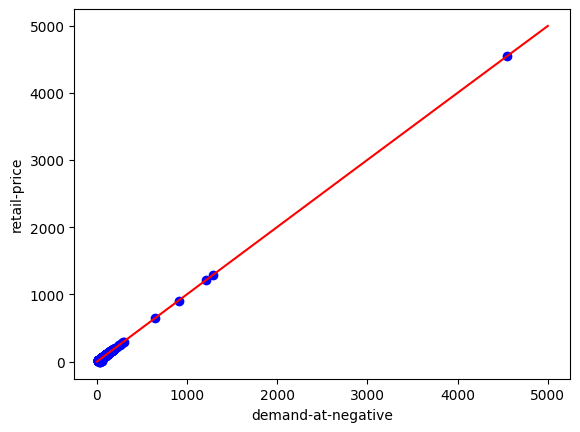

In [97]:
plt.scatter(train['demand-at-negative'], train['retail-price'],  color='blue')

XX = np.arange(0.0, 5000.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("demand-at-negative")
plt.ylabel("retail-price")

In [98]:
df1.columns


Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall'],
      dtype='object')

In [99]:
#training the model
train_x = np.asanyarray(train[['average-negative-RRP']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['average-negative-RRP']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 0.5016397562351838
The MSE is: 21223.19778786812
The MAE is: 3930.93


Text(0, 0.5, 'retail-price')

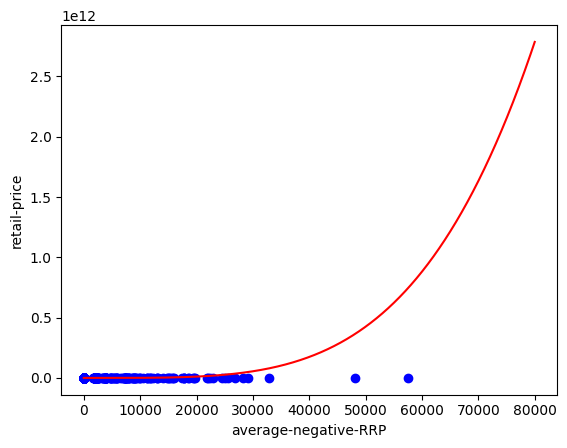

In [100]:
plt.scatter(train['average-negative-RRP'], train['retail-price'],  color='blue')

XX = np.arange(0.0, 80000.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][2]*np.power(XX, 3) + clf.coef_[0][2]*np.power(XX, 4)

plt.plot(XX, yy, '-r' )
plt.xlabel("average-negative-RRP")
plt.ylabel("retail-price")

In [101]:
#training the model
train_x = np.asanyarray(train[['electric-demand']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['electric-demand']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 22.838997395134164
The MSE is: 16458.595054041583
The MAE is: 4195.79


In [102]:
#training the model
train_x = np.asanyarray(train[['demand-at-positive']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-positive']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 16.24979567365178
The MSE is: 17864.084863688422
The MAE is: 4073.99


In [103]:
#training the model
train_x = np.asanyarray(train[['demand-trade-at-negative']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-trade-at-negative']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 0.248098292296417
The MSE is: 21277.27868551724
The MAE is: 3967.82


In [104]:
#training the model
train_x = np.asanyarray(train[['demand-trade-at-positive']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-trade-at-positive']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 0.4883635887206861
The MSE is: 21226.029620757978
The MAE is: 3934.4


In [105]:
#training the model
train_x = np.asanyarray(train[['min-temperature']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['min-temperature']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 3.3239501135768235
The MSE is: 20621.193385123566
The MAE is: 3994.05


In [106]:
#training the model
train_x = np.asanyarray(train[['max-temperature']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['max-temperature']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 20.083498442367762
The MSE is: 17046.348451540307
The MAE is: 4067.79


In [107]:
#training the model
train_x = np.asanyarray(train[['solar']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['solar']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: -0.2597700525340585
The MSE is: 21385.60801181094
The MAE is: 4192.33


In [108]:
#training the model
train_x = np.asanyarray(train[['rainfall']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['rainfall']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 0.08873419084033385
The MSE is: 21311.271364765442
The MAE is: 4033.57


**Polynomial**

---



In [109]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99992141237749
The MSE is: 0.016762895911712095
The MAE is: 3.01


In [110]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.9999539294759
The MSE is: 0.009826934262474852
The MAE is: 2.32


In [111]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'electric-demand', 'average-negative-RRP']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99640162678809
The MSE is: 0.7675401504497089
The MAE is: 20.45


In [112]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'average-negative-RRP', 'demand-trade-at-negative']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'average-negative-RRP', 'demand-trade-at-negative']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99966212345595
The MSE is: 0.07206973767892866
The MAE is: 4.84


In [113]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'average-negative-RRP', 'demand-trade-at-positive']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'average-negative-RRP', 'demand-trade-at-positive']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99700129659878
The MSE is: 0.639629389222387
The MAE is: 17.67


**Best Features - Polynomial**

---



In [114]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99604335831614
The MSE is: 0.843959526835769
The MAE is: 35.17


In [115]:
#training the model
train_x = np.asanyarray(train[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
train_y = np.asanyarray(train[['retail-price']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature']])
test_y = np.asanyarray(test[['retail-price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y_ - test_y))))*100), 2))

The R2 score is: 99.99992141237749
The MSE is: 0.016762895911712095
The MAE is: 3.01


**Modeling**

---



In [116]:
df1.columns


Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall'],
      dtype='object')

In [117]:
X = df1[['demand-at-negative',  'demand-trade-at-negative', 'max-temperature', 'electric-demand', 'average-negative-RRP']]
y = df1['retail-price']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train[:5] #convert to an array

array([[-0.23165   ,  0.13485763, -0.7937764 ,  0.61285301, -0.2243597 ],
       [-0.12509198,  0.13485763, -1.22360508,  1.73911475, -0.2243597 ],
       [-0.38202532, -0.21291206, -0.10923442, -0.53448363,  2.73777141],
       [ 0.33845593,  0.13485763, -0.49130436, -0.24160823, -0.2243597 ],
       [-0.37179328,  0.13485763,  2.23094398,  0.37050457, -0.2243597 ]])

**Linear Regression**

---



In [119]:
# Create a decision tree regressor
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the
#test data

y_hat = model.predict(X_test)

# Assuming y_true are the actual values and y_pred are the predicted values


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using The Linear Regression is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)


The accuracy of using The Linear Regression is: 99.85555602958603
The Mean Square Error (MSE) is: 2.373083931943926
The Root Mean Square Error (RMSE) is: 1.5404817207431984
The Mean Absolute Error (MAE) is: 0.26910085336992784


**Decision Tree Regressor**

---



In [120]:
# Create a decision tree regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the
#test data

y_hat = model.predict(X_test)

# Assuming y_true are the actual values and y_pred are the predicted values


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using The Decision Tree Regressor is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)


The accuracy of using The Decision Tree Regressor is: 98.99774628083246
The Mean Square Error (MSE) is: 16.46612309167984
The Root Mean Square Error (RMSE) is: 4.057847100579301
The Mean Absolute Error (MAE) is: 0.8539014758222746


**Lasso**

---



In [121]:
# Create a Lasso regression model with alpha=1.0 (you can adjust this)
lasso_model = Lasso(alpha=1.0)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = lasso_model.predict(X_test)


# Assuming y_true are the actual values and y_pred are the predicted values


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using Lasso is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)


The accuracy of using Lasso is: 99.62107289463556
The Mean Square Error (MSE) is: 6.22542998881279
The Root Mean Square Error (RMSE) is: 2.4950811587627344
The Mean Absolute Error (MAE) is: 0.5968213540708919


In [122]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)
y_hat = best_lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

#Evaluation

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print('The accuracy of using GridSearch is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)



The accuracy of using GridSearch is: 99.84173647749239
The Mean Square Error (MSE) is: 2.6001266871801008
The Root Mean Square Error (RMSE) is: 1.6124908332080838
The Mean Absolute Error (MAE) is: 0.2632912318069972


**Ridge**

---



In [123]:
# Create a Ridge regression model with alpha=1.0 (you can adjust this)
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = ridge_model.predict(X_test)


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using Ridge is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using Ridge is: 99.8558258823929
The Mean Square Error (MSE) is: 2.3686504941329902
The Root Mean Square Error (RMSE) is: 1.5390420702933985
The Mean Absolute Error (MAE) is: 0.27655721537876077


**Random Forest Regressor**

---



In [124]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)  # Fit the RandomForestRegressor

# Make predictions on the test data
y_hat = rf_regressor.predict(X_test)  # Use the fitted rf_regressor


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using Random Forest Regressor is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using Random Forest Regressor is: 98.21082001419184
The Mean Square Error (MSE) is: 29.39461068197064
The Root Mean Square Error (RMSE) is: 5.421679691937789
The Mean Absolute Error (MAE) is: 0.7953591040813739


**XGBoost**

---



In [125]:
# Create an XGBoost regression model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using XGBoost is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using XGBoost is: 84.15198085469964
The Mean Square Error (MSE) is: 260.3686362197373
The Root Mean Square Error (RMSE) is: 16.135942371604372
The Mean Absolute Error (MAE) is: 2.0741889087034497


In [126]:
params = {
    'objective': 'reg:squarederror',  # For regression problems
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'learning_rate': 0.1,  # Step size shrinkage used in updates to prevent overfitting
    'max_depth': 10,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
    'lambda': 10,  # L2 regularization term on weights
    'eval_metric': 'rmse'  # Evaluation metric for validation
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_round = 50  # Number of boosting rounds
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round)

y_hat = model.predict(dtest)

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using XGBoost is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)


The accuracy of using XGBoost is: 92.51558949218305
The Mean Square Error (MSE) is: 122.9621026427676
The Root Mean Square Error (RMSE) is: 11.088827829972274
The Mean Absolute Error (MAE) is: 4.177688415592314


**Gradient Booster Regressor**

---



In [127]:
# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_hat = gb_regressor.predict(X_test)



#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using Gradient Booster is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using Gradient Booster is: 99.83915325565069
The Mean Square Error (MSE) is: 2.642566688155294
The Root Mean Square Error (RMSE) is: 1.6255973327227422
The Mean Absolute Error (MAE) is: 0.8742163835307523


**SVM**

---



In [128]:
SVM_bank = SVR()

#training

SVM_bank.fit(X_train, y_train)

#prediction

y_hat = SVM_bank.predict(X_test)


#evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of usingthe RBF Kernel is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of usingthe RBF Kernel is: 58.836567818972576
The Mean Square Error (MSE) is: 676.2780004765464
The Root Mean Square Error (RMSE) is: 26.005345613480056
The Mean Absolute Error (MAE) is: 17.54440019658517


In [129]:
SVM_bank = SVR(kernel='linear')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)


#evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using the kernel Linear is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using the kernel Linear is: 99.81144615254972
The Mean Square Error (MSE) is: 3.0977693593442845
The Root Mean Square Error (RMSE) is: 1.7600481127924557
The Mean Absolute Error (MAE) is: 0.2987392239081238


In [130]:
SVM_bank = SVR(kernel='poly')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)


#evaluation

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using the kernel Poly is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using the kernel Poly is: 38.79526357761564
The Mean Square Error (MSE) is: 1005.5385222834211
The Root Mean Square Error (RMSE) is: 31.71022740825775
The Mean Absolute Error (MAE) is: 26.64735821523922


In [131]:
SVM_bank = SVR(kernel='sigmoid')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)


#evaluation

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using the kernel Poly is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using the kernel Poly is: 66.59790904066287
The Mean Square Error (MSE) is: 548.7661764056628
The Root Mean Square Error (RMSE) is: 23.42575882240878
The Mean Absolute Error (MAE) is: 16.754356588145942


**Best Model**

---



In [132]:
# Create a Ridge regression model with alpha=1.0 (you can adjust this)
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = ridge_model.predict(X_test)


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using The Decision Tree is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using The Decision Tree is: 99.8558258823929
The Mean Square Error (MSE) is: 2.3686504941329902
The Root Mean Square Error (RMSE) is: 1.5390420702933985
The Mean Absolute Error (MAE) is: 0.27655721537876077


**Cross Validation**

---



In [133]:
# Assuming X is your feature matrix and y is your target variable
X = df[['demand-trade-at-negative', 'demand-at-negative', 'max-temperature', 'electric-demand', 'average-negative-RRP']]
y = df['retail-price']

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store R-squared values
r2_scores = []
# Initialize a list to store model performance
mse_scores = []

# Iterate through the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate
    #R-squared
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean R-squared across all folds and average MSE

mean_r2 = np.mean(r2_scores)
average_mse = sum(mse_scores) / len(mse_scores)

print("Average MSE:", average_mse)
print("Mean R-squared:", mean_r2)

Average MSE: 1.2175714214614604
Mean R-squared: 0.9996458966600107


In [134]:
#cross validation

model = Ridge(alpha=1.0)

scores = cross_val_score(model, X, y, cv=5, scoring='r2')


print("Mean R-squared:", (scores.mean())*100)
print("Standard deviation of R-squared:", scores.std())

Mean R-squared: 99.95982231549705
Standard deviation of R-squared: 0.0005447702123503554


**Deployment**

---



In [135]:
!pip install imblearn

In [136]:
!pip install gradio==3.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.7 MB/s eta 0:00:00


In [137]:
df.columns

Index(['electric-demand', 'retail-price', 'demand-at-positive',
       'demand-at-negative', 'average-negative-RRP',
       'demand-trade-at-negative', 'demand-trade-at-positive',
       'min-temperature', 'max-temperature', 'solar', 'rainfall', 'school-day',
       'national-holiday', 'school-day_encoded', 'national-holiday_encoded',
       'price_bins'],
      dtype='object')

In [138]:
'demand-at-negative', 'electric-demand', 'average-negative-RRP', 'demand-trade-at-negative', 'max-temperature'

('demand-at-negative',
 'electric-demand',
 'average-negative-RRP',
 'demand-trade-at-negative',
 'max-temperature')

In [139]:
df['demand-at-negative'].describe()

count    2106.000000
mean       76.553847
std       130.114184
min        13.568986
25%        39.117361
50%        66.869058
75%        95.130181
max      4549.645105
Name: demand-at-negative, dtype: float64

In [140]:
df['electric-demand'].describe()

count      2106.000000
mean     120035.476503
std       13747.993761
min       85094.375000
25%      109963.650000
50%      119585.912500
75%      130436.006250
max      170653.840000
Name: electric-demand, dtype: float64

In [141]:
df['average-negative-RRP'].describe()

count     2106.000000
mean       783.171448
std       3578.920686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      57597.595000
Name: average-negative-RRP, dtype: float64

In [142]:
df['demand-trade-at-negative'].describe()

count    2106.000000
mean       -2.686052
std        19.485432
min      -342.220000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: demand-trade-at-negative, dtype: float64

In [143]:
df['max-temperature'].describe()

count    2106.000000
mean       20.413200
std         6.288693
min         9.000000
25%        15.525000
50%        19.100000
75%        23.900000
max        43.500000
Name: max-temperature, dtype: float64

In [144]:
#Deployment

In [145]:
X = df1[['demand-at-negative',  'demand-trade-at-negative', 'max-temperature', 'electric-demand', 'average-negative-RRP']]
y = df1['retail-price']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train[:5] #convert to an array

array([[-0.23165   ,  0.13485763, -0.7937764 ,  0.61285301, -0.2243597 ],
       [-0.12509198,  0.13485763, -1.22360508,  1.73911475, -0.2243597 ],
       [-0.38202532, -0.21291206, -0.10923442, -0.53448363,  2.73777141],
       [ 0.33845593,  0.13485763, -0.49130436, -0.24160823, -0.2243597 ],
       [-0.37179328,  0.13485763,  2.23094398,  0.37050457, -0.2243597 ]])

In [147]:
# Create a Ridge regression model with alpha=1.0 (you can adjust this)
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = ridge_model.predict(X_test)


#Evaluation
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print('The accuracy of using Ridge is:', ((r2)*100))
print("The Mean Square Error (MSE) is:", mse)
print("The Root Mean Square Error (RMSE) is:", rmse)
print("The Mean Absolute Error (MAE) is:", mae)

The accuracy of using Ridge is: 99.8558258823929
The Mean Square Error (MSE) is: 2.3686504941329902
The Root Mean Square Error (RMSE) is: 1.5390420702933985
The Mean Absolute Error (MAE) is: 0.27655721537876077


In [148]:
import gradio as gr
def make_prediction(demand_at_negative, demand_trade_at_negative, max_temperature, electric_demand, average_negative_RRP):

   input_data = pd.DataFrame({
        'demand-at-negative': [demand_at_negative],
        'demand-trade-at-negative': [demand_trade_at_negative],
        'max-temperature': [max_temperature],
        'electric-demand': [electric_demand],
        'average-negative-RRP': [average_negative_RRP]
    })
   #Transform input data using the preprocessor
   input_transformed  = scaler.transform(input_data)

   # make prediction
   prediction =  ridge_model.predict(input_transformed)[0]

   return prediction

#create gradio interface

inputs = [gr.Slider(13.568986, 4549.645105, label = 'Demand negative'),
gr.Slider(-342.220000,   0.000000, label = 'Demand trade at negative'),
gr.Slider(9.000000,  43.500000, label = 'max temp'),
gr.Slider(85094.375000,   170653.840000, label = 'electric demand'),
gr.Slider( 0.000000, 57597.595000, label = 'average-negative-RRP')]

output=gr.Number(label = 'Predicted Price')

app=gr.Interface(fn=make_prediction,inputs=inputs, outputs = output)
app.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.43.1, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://086a283a7083940ac3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://086a283a7083940ac3.gradio.live
